In [13]:
import numpy as np
import os
import tensorflow as tf
import pickle
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [120]:
def unpickle(file):
    with open(file, "rb") as f:
        samples = pickle.load(f)
    return samples

In [20]:
training = unpickle("training.pkl")

In [54]:
def generator(z, kernel_size = 4, reuse = False, lrelu_factor = 0.2, initializer = tf.contrib.layers.xavier_initializer(), training = True):
    with tf.variable_scope('generator', reuse = reuse):
        G_dense = tf.layers.dense(inputs = z, units = 8192)
        G_volumn = tf.reshape(tensor = G_dense, shape = (-1, 2, 2, 2048))
        G_h1 = tf.layers.batch_normalization(inputs = G_volumn, training = training)
        G_h1 = tf.maximum(G_h1 * lrelu_factor, G_h1)
            
        G_h2 = tf.layers.conv2d_transpose(filters = 1024, strides = 2, kernel_size = kernel_size, 
                                      padding = 'same', inputs = G_h1, activation = None, 
                                      kernel_initializer = initializer)
        G_h2 = tf.layers.batch_normalization(inputs= G_h2, training = training)
        G_h2 = tf.maximum(G_h2 * lrelu_factor, G_h2)
            
        G_h3 = tf.layers.conv2d_transpose(filters = 512, strides = 2, kernel_size = kernel_size, 
                                          padding = 'same', inputs = G_h2, activation = None, 
                                          kernel_initializer = initializer)
        G_h3 = tf.layers.batch_normalization(inputs= G_h3, training = training)
        G_h3 = tf.maximum(G_h3 * lrelu_factor, G_h3)
            
        G_h4 = tf.layers.conv2d_transpose(filters = 256, strides = 2, kernel_size = kernel_size, 
                                          padding = 'same', inputs = G_h3, activation = None, 
                                          kernel_initializer = initializer)
        G_h4 = tf.layers.batch_normalization(inputs= G_h4, training = training)
        G_h4 = tf.maximum(G_h4 * lrelu_factor, G_h4)
            
        G_h5 = tf.layers.conv2d_transpose(filters = 128, strides = 2, kernel_size = kernel_size, 
                                              padding = 'same', inputs = G_h4, activation = None, 
                                              kernel_initializer = initializer)
        G_h5 = tf.layers.batch_normalization(inputs= G_h5, training = training)
        G_h5 = tf.maximum(G_h5 * lrelu_factor, G_h5)
        
        G_h6 = tf.layers.conv2d_transpose(filters = 64, strides = 2, kernel_size = kernel_size, 
                                              padding = 'same', inputs = G_h5, activation = None, 
                                              kernel_initializer = initializer)
        G_h6 = tf.layers.batch_normalization(inputs= G_h6, training = training)
        G_h6 = tf.maximum(G_h6 * lrelu_factor, G_h6)
        
        G_h7 = tf.layers.conv2d_transpose(filters = 32, strides = 2, kernel_size = kernel_size, 
                                              padding = 'same', inputs = G_h6, activation = None, 
                                              kernel_initializer = initializer)
        G_h7 = tf.layers.batch_normalization(inputs= G_h7, training = training)
        G_h7 = tf.maximum(G_h7 * lrelu_factor, G_h7)
            
        G_logits = tf.layers.conv2d_transpose(filters = 3, strides = 2, kernel_size = kernel_size, 
                                              padding = 'same', inputs = G_h7, activation = None, 
                                              kernel_initializer = initializer)
        result = tf.tanh(x = G_logits)
        return result

W1130 03:02:27.143129  6664 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [55]:
def discriminator(image, kernel_size = 4, reuse = False, lrelu_factor = 0.2, initializer = tf.contrib.layers.xavier_initializer(), training = True):
    with tf.variable_scope('discriminator', reuse = reuse):
        D_h1 = tf.layers.conv2d(inputs = image, filters = 32, strides = 2, 
                                kernel_size = kernel_size, padding = 'same', 
                                kernel_initializer = initializer)
        D_h1 = tf.maximum(D_h1 * lrelu_factor, D_h1)
        
        D_h2 = tf.layers.conv2d(inputs = D_h1, filters = 64, strides = 2, 
                                kernel_size = kernel_size, padding = 'same', 
                                kernel_initializer = initializer)
        D_h2 = tf.layers.batch_normalization(inputs = D_h2, training = training)
        D_h2 = tf.maximum(D_h2 * lrelu_factor, D_h2)
        
        D_h3 = tf.layers.conv2d(inputs = D_h2, filters = 128, strides = 2, 
                                kernel_size = kernel_size, padding = 'same', 
                                kernel_initializer = initializer)
        D_h3 = tf.layers.batch_normalization(inputs = D_h3, training = training)
        D_h3 = tf.maximum(D_h3 * lrelu_factor, D_h3)
        
        D_h4 = tf.layers.conv2d(inputs = D_h3, filters = 256, strides = 2, 
                                kernel_size = kernel_size, padding = 'same', 
                                kernel_initializer = initializer)
        D_h4 = tf.layers.batch_normalization(inputs = D_h4, training = training)
        D_h4 = tf.maximum(D_h4 * lrelu_factor, D_h4)
        
        D_h5 = tf.layers.conv2d(inputs = D_h4, filters = 512, strides = 2, 
                                kernel_size = kernel_size, padding = 'same', 
                                kernel_initializer = initializer)
        D_h5 = tf.layers.batch_normalization(inputs = D_h5, training = training)
        D_h5 = tf.maximum(D_h5 * lrelu_factor, D_h5)
        
        D_h6 = tf.layers.conv2d(inputs = D_h5, filters = 1024, strides = 2, 
                                kernel_size = kernel_size, padding = 'same', 
                                kernel_initializer = initializer)
        D_h6 = tf.layers.batch_normalization(inputs = D_h6, training = training)
        D_h6 = tf.maximum(D_h6 * lrelu_factor, D_h6)
        
        D_h7 = tf.layers.conv2d(inputs = D_h6, filters = 2048, strides = 2, 
                                kernel_size = kernel_size, padding = 'same', 
                                kernel_initializer = initializer)
        D_h7 = tf.layers.batch_normalization(inputs = D_h7, training = training)
        D_h7 = tf.maximum(D_h7 * lrelu_factor, D_h7)
        
        flatten = tf.reshape(tensor = D_h7, shape = (-1, 8192))
        
        D_logits = tf.layers.dense(inputs = flatten, units = 1, activation = None, 
                               kernel_initializer = initializer)
        
        result = tf.sigmoid(x = D_logits)
        return result, D_logits
        

In [56]:
def setup_training(learning_rate = 0.0005, beta1 = 0.5, beta2 = 0.999, batch_size  = 1, z_dim = 100, width = 256, height = 256):
    tf.reset_default_graph()
    real_images = tf.placeholder(dtype = tf.float32, shape = [batch_size, width, height, 3])
    noise = tf.placeholder(dtype=tf.float32, shape = [batch_size, z_dim], name='noise')
    fake_images = generator(noise)
    real_output, real_logits = discriminator(real_images)
    fake_output, fake_logits = discriminator(fake_images, reuse = True)
    G_loss = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(logits = fake_logits, multi_class_labels = tf.ones_like(fake_logits)))
    D_loss_real = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(logits = real_logits, multi_class_labels = tf.ones_like(real_logits)))
    D_loss_fake = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(logits = fake_logits, multi_class_labels = tf.zeros_like(fake_logits)))
    D_loss = D_loss_real + D_loss_fake
    G_vars = [v for v in tf.trainable_variables() if v.name.startswith('generator')]
    D_vars = [v for v in tf.trainable_variables() if v.name.startswith('discriminator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        G_optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1, beta2 = beta2).minimize(G_loss, var_list = G_vars)
        D_optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1, beta2 = beta2).minimize(D_loss, var_list = D_vars)
    return G_optimizer, D_optimizer, G_loss, D_loss, noise, real_images

In [18]:
def get_batch(dataset, batch_size):
    data_indices = np.arange(dataset.shape[0])
    np.random.shuffle(data_indices)
    batch = dataset[data_indices[:batch_size], :, :, :].astype("float") / 255.
    return batch

In [61]:
def clip_image(image):
    image = np.where(image > 1.0, 1.0, image)
    image = np.where(image < 0.0, 0.0, image)
    return image

In [118]:
def get_part_batch(img, size, batch_size):
    batch = []
    img_w = img.shape[1]
    img_h = img.shape[0]
    width = size[0]
    height = size[1]
    for i in range(batch_size):
        x = random.randint(0, img_w - width) 
        y = random.randint(0, img_h - height)
        batch.append(img[y : y + height,x : x + width , :])
#     return np.concatenate(batch).reshape((batch_size, size[0], size[1], 3))
#         print(batch)
#     batch = np.asarray(batch)
    batch = np.concatenate(batch)
    return batch.reshape((batch_size, height, width, 3)).astype("float") / 255.

In [140]:
img = unpickle("texture.pkl")
img = get_part_batch(img, (256, 256), 10)

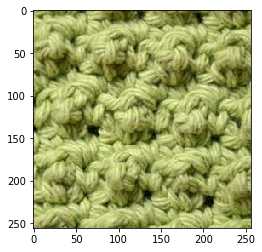

(10, 256, 256, 3)


In [146]:

plt.imshow(img[1])
plt.show()
print(img.shape)

In [117]:
def train(batch_size = 8, z_dim = 100, epochs = 201, iters = 10, save_path = "./", image = None):
    G_optimizer, D_optimizer, G_loss, D_loss, noise, real_images = setup_training(batch_size = batch_size, z_dim = z_dim)
#     image = unpickle("training.pkl")
#     image = image/255.
#     print(image.shape)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        for epoch in range(epochs):
            print("------------------epoch ", epoch, "----------------")
            for i in range(iters):
                z = np.random.uniform(-1, 1, [batch_size, z_dim])
                batch = get_part(image, (256, 256), batch_size)
                _ = sess.run(D_optimizer, feed_dict = {noise: z, real_images: batch})
                
            z = np.random.uniform(-1, 1, [batch_size, z_dim])
            batch = get_part(image, (256, 256), batch_size)
            _ = sess.run(G_optimizer, feed_dict = {noise: z, real_images: batch})
            losses = sess.run([G_loss, D_loss], feed_dict = {noise: z, real_images: batch})
            print("iter ", i, ", G loss: ", losses[0], ", D loss: ", losses[1])
            z = np.random.uniform(-1, 1, [1, z_dim])
            z_input = tf.placeholder(dtype=tf.float32, shape = [1, z_dim], name='noise')
            generated = sess.run(generator(z_input, reuse = True, training = False), feed_dict = {z_input: z})[0]
            print(generated)
            plt.imsave(os.path.join(save_path, 'images/image_epoch%d.jpg' % epoch), clip_image(generated))
            plt.imshow(generated)
            plt.show()
            
            if(epoch % 40 == 0):
                saver.save(sess, os.path.join(save_path, "models/model.ckpt"), global_step = epoch)

------------------epoch  0 ----------------
iter  0 , G loss:  36.366802 , D loss:  6.2219056e-14
iter  1 , G loss:  41.613598 , D loss:  8.4765245e-19
iter  2 , G loss:  7.187311 , D loss:  0.00075640535
iter  3 , G loss:  28.42494 , D loss:  0.003417163
iter  4 , G loss:  20.660831 , D loss:  3.0628857e-07
iter  5 , G loss:  5.864737 , D loss:  0.0028418035
iter  6 , G loss:  15.175883 , D loss:  2.5657354e-07
iter  7 , G loss:  8.899429 , D loss:  0.00013647608
iter  8 , G loss:  12.992683 , D loss:  2.2769298e-06
iter  9 , G loss:  10.752927 , D loss:  2.1382953e-05
iter  10 , G loss:  15.603051 , D loss:  4.4527915e-05
iter  11 , G loss:  16.287561 , D loss:  8.451377e-08
iter  12 , G loss:  14.3777485 , D loss:  0.00017192693
iter  13 , G loss:  6.542217 , D loss:  0.0014423297
iter  14 , G loss:  11.280252 , D loss:  0.0017215156
iter  15 , G loss:  10.880601 , D loss:  7.4860225e-05
iter  16 , G loss:  4.6865263 , D loss:  0.00926141
iter  17 , G loss:  9.967079 , D loss:  5.06

W1130 03:06:54.425107  6664 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


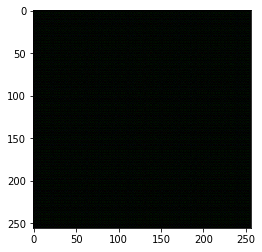

------------------epoch  1 ----------------
iter  0 , G loss:  14.87985 , D loss:  3.4495545e-07
iter  1 , G loss:  12.896932 , D loss:  0.0008810687
iter  2 , G loss:  8.579962 , D loss:  0.00018785
iter  3 , G loss:  14.812676 , D loss:  0.051004484
iter  4 , G loss:  15.575909 , D loss:  1.7420213e-07
iter  5 , G loss:  15.095512 , D loss:  6.797973e-07
iter  6 , G loss:  13.598347 , D loss:  0.00021888969
iter  7 , G loss:  10.462586 , D loss:  2.8595465e-05
iter  8 , G loss:  17.005518 , D loss:  0.34945604
iter  9 , G loss:  16.230497 , D loss:  8.936851e-08
iter  10 , G loss:  12.828176 , D loss:  2.6840758e-06
iter  11 , G loss:  9.619025 , D loss:  0.00034927658
iter  12 , G loss:  3.4712434 , D loss:  0.031571545
iter  13 , G loss:  9.259802 , D loss:  9.542275e-05
iter  14 , G loss:  9.531566 , D loss:  0.03314107
iter  15 , G loss:  6.8411183 , D loss:  0.0028423988
iter  16 , G loss:  11.988698 , D loss:  0.04189665
iter  17 , G loss:  12.82775 , D loss:  0.009669702
iter 

W1130 03:07:59.879491  6664 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


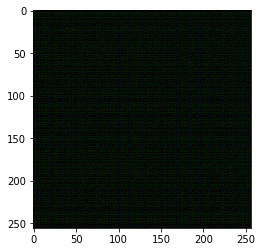

------------------epoch  2 ----------------
iter  0 , G loss:  3.4296496 , D loss:  0.044258714
iter  1 , G loss:  6.295698 , D loss:  0.017868254


KeyboardInterrupt: 

In [62]:
image = mpimg.imread("texture.jpg")
train(save_path = 'Result/', image = image)

W1130 14:57:56.241464  6664 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


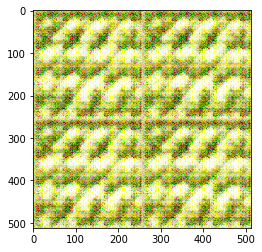

In [202]:
saver = tf.train.Saver()
with tf.Session() as sess:
    with tf.variable_scope(tf.get_variable_scope(), reuse=True):
        saver.restore(sess, './Result4/models/model.ckpt-80')
        z = np.random.uniform(-1, 1, [4, 100])
        z_input = tf.placeholder(dtype=tf.float32, shape = [4, 100], name='noise')
        generated = sess.run(generator(z_input, reuse = True, training = False), feed_dict = {z_input: z})
#         print(generated.shape)
        big = np.zeros((512,512,3)).astype("float")
        im = generated[0]
        big[0:256, 0:256, :] = generated[0]
        big[0:256, 256:512, :] = generated[0]
        big[256:512, 0:256, :] = generated[0]
        big[256:512, 256:512, :] = generated[0]
        plt.imshow(big)
        plt.show()
        plt.imsave("80.jpg", clip_image(big))
#         for img in generated:
#             plt.imshow(img)
#             plt.show()